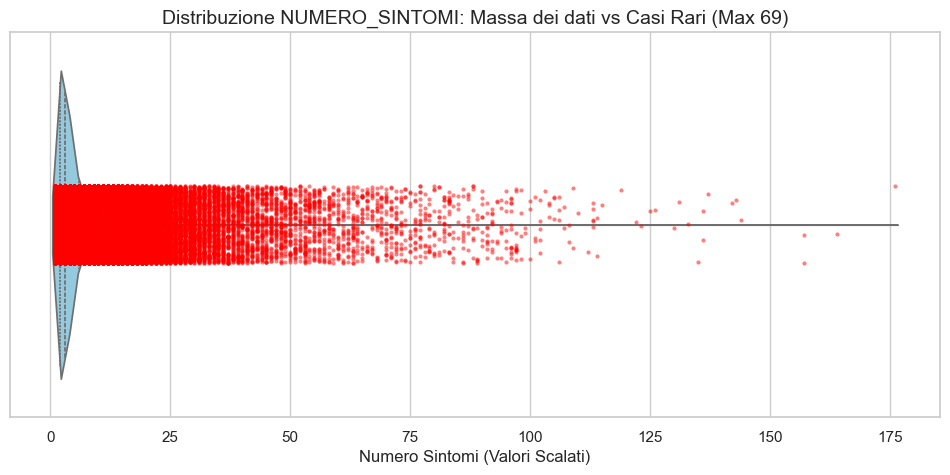

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Caricamento
df = pd.read_csv('data/raw/VAERS_READY_FOR_SPLIT.csv', sep=None, engine='python')
df.columns = df.columns.str.strip()

col_symp = 'NUMERO_SINTOMI'

if col_symp in df.columns:
    sns.set_theme(style="whitegrid")
    fig, ax = plt.subplots(figsize=(12, 5))

    # Il Violin Plot mostra la "pancia" della distribuzione dove ci sono più dati
    sns.violinplot(x=df[col_symp], inner="quartile", color="skyblue", ax=ax)

    # Aggiungiamo i singoli punti (jittered) per vedere fisicamente i casi rari
    sns.stripplot(x=df[col_symp], color="red", alpha=0.5, size=3, jitter=True, ax=ax)

    # TRUCCO PER LA SCALA:
    # Se la massa è intorno a 0-10, ma il max è 69, impostiamo un limite visivo
    # che copra la maggior parte dei dati, lasciando il 69 fuori o in un angolo.
    # In alternativa, lasciamo la scala libera ma usiamo la densità.
    plt.title(f'Distribuzione {col_symp}: Massa dei dati vs Casi Rari (Max 69)', fontsize=14)
    plt.xlabel('Numero Sintomi (Valori Scalati)')

    # Opzionale: decommenta la riga sotto se vuoi "zoomare" solo sulla parte densa (es. fino a 20)
    # plt.xlim(-2, 20)

    plt.show()
else:
    print(f"Colonna {col_symp} non trovata.")